Create cross section of pygem simulation results for analysis of binned monthly thickness

Brandon S. Tober
20230629

In [35]:
### imports ###
# # Built-in libraries
# # import argparse
# #from collections import OrderedDict
# from collections import Counter
# #import datetime
# #import glob
# import os
# import pickle
# import shutil
# import time
# #import zipfile
# # External libraries
# import cartopy
# import cartopy.crs as ccrs
# from cartopy.io.shapereader import Reader
# from cartopy.feature import ShapelyFeature
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.path as mpath
# #from matplotlib.pyplot import MaxNLocator
# from matplotlib.lines import Line2D
# #import matplotlib.patches as mpatches
# from matplotlib.ticker import MultipleLocator
# from matplotlib.ticker import AutoMinorLocator
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# #from matplotlib.ticker import EngFormatter
# #from matplotlib.ticker import StrMethodFormatter
# #from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# #from mpl_toolkits.basemap import Basemap
# import geopandas
# import numpy as np
import pandas as pd
# from scipy.stats import median_abs_deviation
# from scipy.stats import linregress
# from scipy.ndimage import generic_filter
# from scipy.ndimage import uniform_filter
#import scipy
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

# Local libraries
#import class_climate
#import class_mbdata
import pygem_input as pygem_prms
#from oggm import utils
from pygem.oggm_compat import single_flowline_glacier_directory
from pygem.shop import debris 
from oggm import tasks
#import pygemfxns_gcmbiasadj as gcmbiasadj
# import pygem.pygem_modelsetup as modelsetup

# #from oggm import utils
# from pygem.oggm_compat import single_flowline_glacier_directory
# from pygem.shop import debris 
# from oggm import tasks

In [2]:
cs_year = 2000
vol_norm_endyear = 2100
startyear = 2015
endyear = 2100
years = np.arange(2000,2101+1)

startyear_idx = np.where(years == startyear)[0][0]
cs_idx = np.where(years == cs_year)[0][0]

In [15]:
sim_dir = pygem_prms.output_filepath + '/simulations/'
binned_dir = sim_dir + '15/ERA5/binned/' 
stats_dir = sim_dir + '15/ERA5/stats/'
glac_no = os.listdir(binned_dir)[0].split('_')[0]
binned_fp = binned_dir + glac_no + '_ERA5_HH2015_ba1_1sets_1981_2020_binned.nc'
stats_fp = stats_dir + glac_no + '_ERA5_HH2015_ba1_1sets_1981_2020_all.nc'

In [19]:
ds_binned = xr.open_dataset(binned_fp)
ds_stats = xr.open_dataset(stats_fp)

thick = ds_binned.bin_thick_annual[0,:,:].values
zsurf_init = ds_binned.bin_surface_h_initial[0].values
zbed = zsurf_init - thick[:,cs_idx]
vol = ds_stats.glac_volume_annual[0,:].values

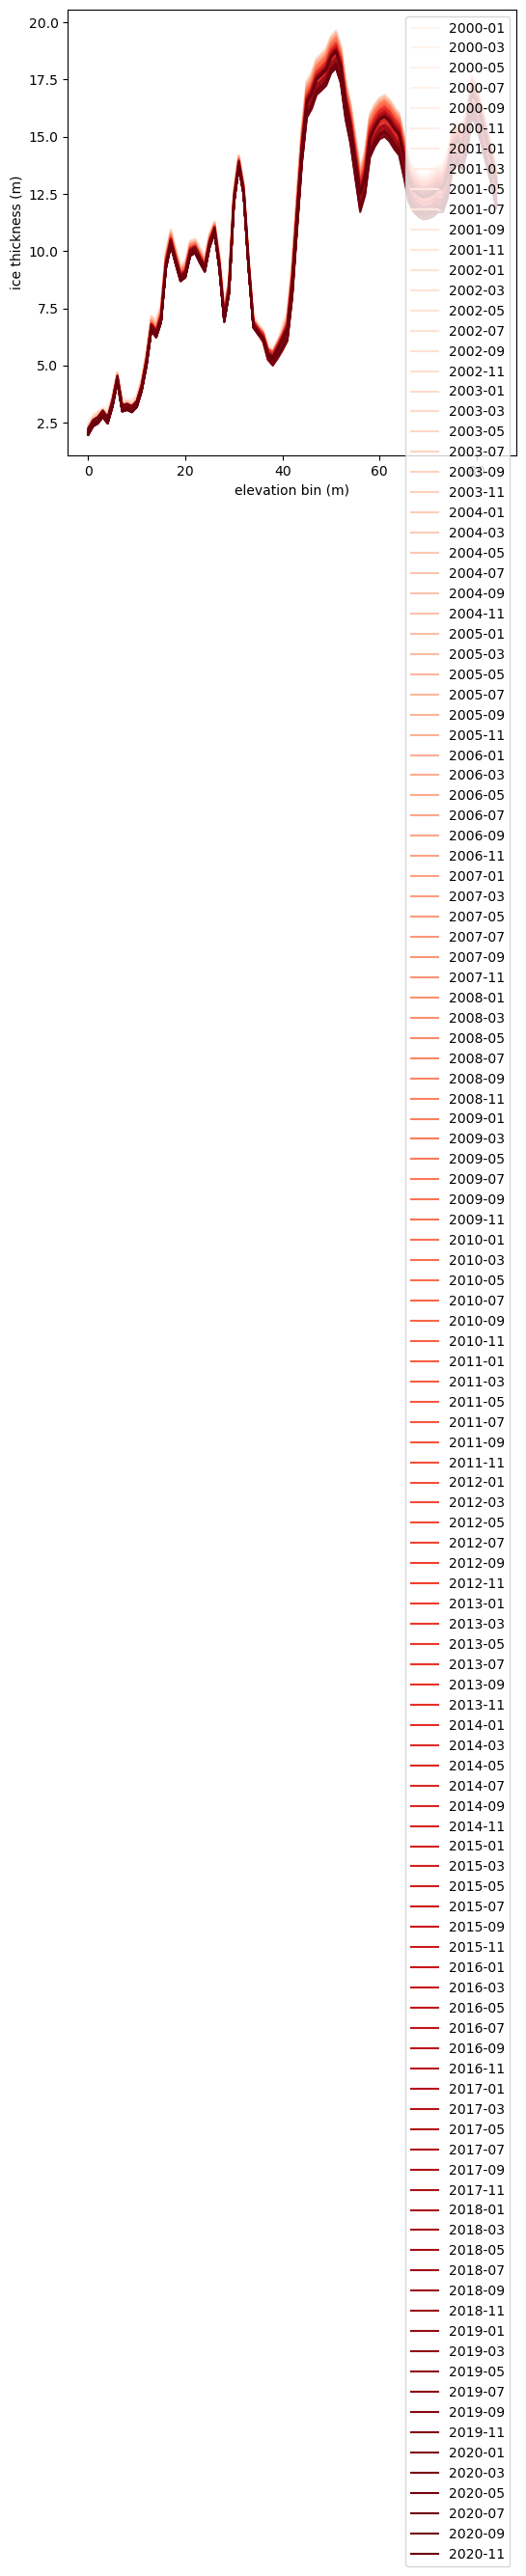

In [62]:
fig,ax = plt.subplots(1,figsize=(6,6))
cm = mpl.cm.Reds(np.linspace(0,1,len(ds_binned.time)))
time = pd.Series(ds_binned.time).map(lambda x: x.strftime('%Y-%m'))

# for now, clip bins above which thickness is zero
clip = np.where(ds_binned.bin_thick_monthly.values[:,:,0].flatten()==0)[0][0]
# loop through years
for i, val in enumerate(time):
    if i % 2 != 0:
        continue
    ax.plot(ds_binned.bin.values[:clip],ds_binned.bin_thick_monthly[0,:clip,i],c=cm[i],label=val)

ax.set_xlabel('elevation bin (m)')
ax.set_ylabel('ice thickness (m)')
ax.legend()